# Ridge Regression and the LASSO

We'll look at regression using ridge regression and the LASSO. We'll use the Boston house prices dataset, which gives house prices for 506 Boston houses against 13 predictive variables. We'll see that the different regression methods give us rather different results and performance.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data # inputs/predictors
y = boston.target #outputs/prices

#Divide the set into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [173]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

As you can see, the dataset considers 13 different predictors, including crime rates, property tax, as well as racial and socioeconomic factors. This data is extracted from US Census data; Boston and its environs were partitioned into 506 parcels, and the median home value in each parcel was calculated and the predictor values were collected for each parcel.

Let's look at a few data points to get a sense of scale.

In [2]:
print(X[10:10+3,:])
print(y[10:10+3])

[[  2.24890000e-01   1.25000000e+01   7.87000000e+00   0.00000000e+00
    5.24000000e-01   6.37700000e+00   9.43000000e+01   6.34670000e+00
    5.00000000e+00   3.11000000e+02   1.52000000e+01   3.92520000e+02
    2.04500000e+01]
 [  1.17470000e-01   1.25000000e+01   7.87000000e+00   0.00000000e+00
    5.24000000e-01   6.00900000e+00   8.29000000e+01   6.22670000e+00
    5.00000000e+00   3.11000000e+02   1.52000000e+01   3.96900000e+02
    1.32700000e+01]
 [  9.37800000e-02   1.25000000e+01   7.87000000e+00   0.00000000e+00
    5.24000000e-01   5.88900000e+00   3.90000000e+01   5.45090000e+00
    5.00000000e+00   3.11000000e+02   1.52000000e+01   3.90500000e+02
    1.57100000e+01]]
[ 15.   18.9  21.7]


The house prices are given in units of $1000 -- and these prices were recorded in the 1970s! On the other hand, the NOX concentration values are small, measured in parts per 10 million.

Let's run a standard linear regression and see what we get.

34.0842148665


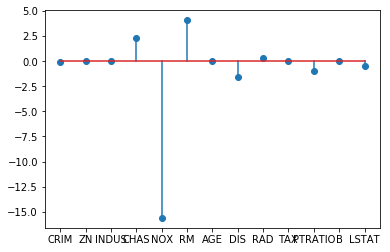

In [17]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print(lr.intercept_)
plt.stem(lr.coef_)
my_xticks = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.xticks(np.arange(13), my_xticks)
plt.show()

The intercept gives the baseline average price, at ~$27,000. Proximity to the Charles river and number of rooms increases the predicted price, whereas distance from employment centers, pupil-teacher ratio, and NOX concentration decrease it.

Let's see how well this linear regression works in terms of mean-squared error on the test set.

In [18]:
y_pred = lr.predict(X_test)
MSE = 1/len(y_test)*np.linalg.norm(y_test - y_pred)
print(MSE)

0.525522466237


This simple model predicts the test prices to within ~$750. This isn't bad. Given that we have ~500 data samples with which to estimate 14 regression coefficients, we can be reasonably confident that we have not overfit to the dataset.

Nevertheless, let's try out ridge regression and see how the results change.

26.3429025477


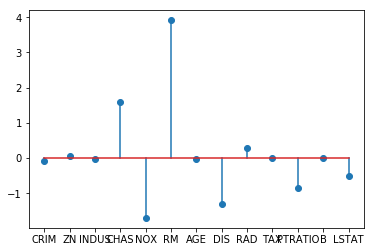

In [19]:
rr = Ridge(alpha=10.0)
rr.fit(X_train,y_train)

print(rr.intercept_)
plt.stem(rr.coef_)
my_xticks = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.xticks(np.arange(13), my_xticks)
plt.show()

The basic trends are the same. Note that all of the coefficients are smaller in magnitude, and in particular the coefficient associated with the NOX value is much smaller. Otherwise the trends are essentially unchanged.

Now let's see how well the ridge-regressed model predicts the test set values.

In [20]:
y_pred = rr.predict(X_test)
MSE = 1/len(y_test)*np.linalg.norm(y_test - y_pred)
print(MSE)

0.53829585972


The mean-squared error is slightly worse. For larger values of alpha, we are likely to get worse MSE performance in exchange for a simpler model. Since the original model is very unlikely to have overfit, there isn't as much advantage in regularizing the norm of the coefficients.

Next, let's try LASSO.

41.0660847685


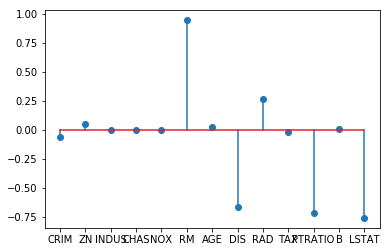

In [21]:
lasso = Lasso(alpha=1.0)
lasso.fit(X,y)

print(lasso.intercept_)
plt.stem(lasso.coef_)
my_xticks = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.xticks(np.arange(13), my_xticks)
plt.show()

The big difference is that LASSO has eliminated the dependency on NOX. The previous two regressions were misleading. They gave a large NOX coefficient, suggesting that there is a strong dependency on the NOX value. However, since the NOX value is at least an order of magnitude smaller than the other variables, its total impact on prediction is rather small. LASSO is looking for as simple an explanation as possible for the output, and it eliminates NOX entirely.

Finally, let's see how well LASSO performs on the test set in terms of MSE.

In [22]:
y_pred = lasso.predict(X_test)
MSE = 1/len(y_test)*np.linalg.norm(y_test - y_pred)
print(MSE)

0.541103466824


It's comparable to the previous two. For each regularization type, we have simplified the model while paying a negligible price in terms of prediction power.

Since the number of variable is rather small, it is easy to underestimate the power of regularization models. When the number of predictors gets into the thousands or millions, the danger of overfitting and the benefit of an interpetable model become large. Here LASSO has pruned a single variable that is largely irrelevant from the prediction.

To see better the benefits of ridge regression, we will isolate a small subset of the training set. Here, overfitting is a real danger, and regularization will give us a big win.

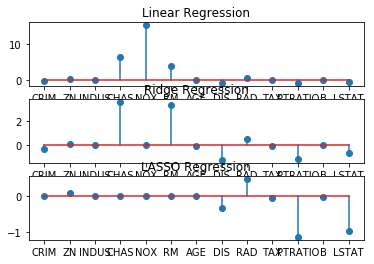

In [26]:
num_samples = 20
train_indices = np.random.choice(len(y_train), num_samples, replace=False)
X_small = X_train[train_indices]
y_small = y_train[train_indices]

lr_small = LinearRegression()
lr_small.fit(X_small,y_small)

rr_small = Ridge(alpha=1.0)
rr_small.fit(X_small,y_small)

lasso_small = Lasso(alpha=1.0)
lasso_small.fit(X_small,y_small)


plt.subplot(3,1,1)
plt.stem(lr_small.coef_)
my_xticks = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.xticks(np.arange(13), my_xticks)
plt.title('Linear Regression')

plt.subplot(3,1,2)
plt.stem(rr_small.coef_)
my_xticks = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.xticks(np.arange(13), my_xticks)
plt.title('Ridge Regression')

plt.subplot(3,1,3)
plt.stem(lasso_small.coef_)
my_xticks = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
plt.xticks(np.arange(13), my_xticks)
plt.title('LASSO Regression')

plt.show()

Standard linear regression is all over the map. Depending on the specific training examples chosen, we see wild varaition in the output coefficients. Both Ridge regression and LASSO are much better behaved -- picking up correctly on the trend that number of rooms is a positive correlation and pupil-teacher ratio is a negative one.

Let's see the MSE performance over the test set. It turns out that the regularized models generalize better, as one would expect.

In [202]:
y_pred = lr_small.predict(X_test)
MSE = 1/len(y_test)*np.linalg.norm(y_test - y_pred)
print(np.sqrt(MSE))

y_pred = rr_small.predict(X_test)
MSE = 1/len(y_test)*np.linalg.norm(y_test - y_pred)
print(np.sqrt(MSE))

y_pred = lasso_small.predict(X_test)
MSE = 1/len(y_test)*np.linalg.norm(y_test - y_pred)
print(np.sqrt(MSE))

1.05381984325
0.794181119633
0.82492067638
